
0: 320x640 2 laptops, 64.3ms
Speed: 2.5ms preprocess, 64.3ms inference, 2.9ms postprocess per image at shape (1, 3, 320, 640)


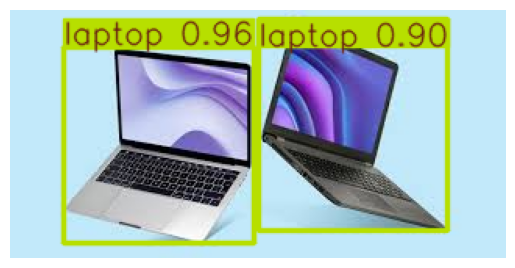

In [ ]:
import autorootcwd
from ultralytics import YOLO
import cv2 as cv
import matplotlib.pyplot as plt
import torch

device_arg = 0 if torch.cuda.is_available() else "cpu"

yolo_model = YOLO("model/yolo12n.pt")
image_path = "data/notebook_data/laptop_images.jpg"
image = cv.cvtColor(cv.imread(image_path), cv.COLOR_BGR2RGB)

# YOLO 추론
yolo_result = yolo_model(image)
predicted_image = yolo_result[0].plot()


plt.imshow(predicted_image)
plt.axis('off')
plt.show()

In [ ]:
yolo_box_coords = yolo_result[0].boxes.xyxy
len(yolo_box_coords)

2

In [ ]:
yolo_result[0].plot()

array([[[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]],

       [[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]],

       [[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]],

       ...,

       [[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]],

       [[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]],

       [[194, 233, 250],
        [194, 233, 250],
        [194, 233, 250],
        ...,
        [194, 233, 250],
        [194, 233, 250],
        [194, 233, 250]]

감지된 박스 개수: 2
FastSAM에 전달할 박스 좌표: tensor([[ 34.1542,  24.7053, 156.3823, 149.3509],
        [159.9486,   6.3686, 280.4538, 141.1605]], device='cuda:0')

0: 320x640 2 objects, 50.7ms
Speed: 1.6ms preprocess, 50.7ms inference, 147.8ms postprocess per image at shape (1, 3, 320, 640)


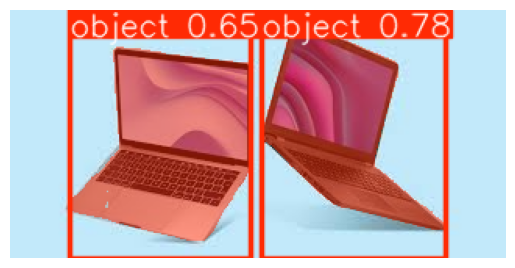

In [ ]:
from ultralytics import FastSAM
import matplotlib.pyplot as plt


if len(yolo_box_coords) == 0:
    print("no detections; skip FastSAM prompt")
else:
    print(f"감지된 박스 개수: {len(yolo_box_coords)}")
    print(f"FastSAM에 전달할 박스 좌표: {yolo_box_coords}")
 
    # 2) Run FastSAM with all YOLO bboxes as prompts
    fastsam = FastSAM("model/FastSAM-s.pt")
    fastsam_results = fastsam.predict(source= image, bboxes=yolo_box_coords, device=device_arg,
                          retina_masks=True, imgsz=640, conf=0.5, iou=0.9)

    # 3) Plot
    annotated_image = fastsam_results[0].plot()
    plt.imshow(annotated_image)
    plt.axis('off')
    plt.show()

In [ ]:
print(f"image.shape : {image.shape} \n type(image) : {type(image)}")

image.shape : (159, 318, 3) 
 type(image) : <class 'numpy.ndarray'>


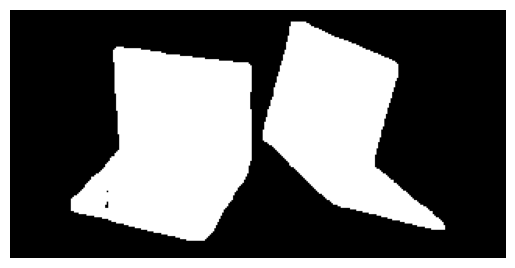

In [ ]:
import numpy as np

# NumPy 출력 옵션 설정 (전체 값 보기)
# np.set_printoptions(threshold=np.inf, linewidth=np.inf)

masks = fastsam_results[0].masks.data.cpu().numpy() 

# 마스크가 여러개면 합치기 (OR 연산) 
if len(masks.shape) >= 2 : 
    binary_mask = np.any(masks > 0 , axis = 0)
else :
    binary_mask = masks

binary_image = (binary_mask * 255).astype(np.uint8)

plt.imshow(binary_image , cmap = "gray")
plt.axis('off')
plt.show()

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

binary_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
# 원래 tensor 가 깊 세 가 순서임 
print(f"masks.shape : {masks.shape} \n type(masks) : {type(masks)} \n masks.dtype : {masks.dtype}")

masks.shape : (2, 159, 318) 
 type(masks) : <class 'numpy.ndarray'> 
 masks.dtype : uint8
